Gabrielle Angelica - 2301893985

1. Compute Gaussian derivatives at each pixel
2. Compute second moment matrix M in a Gaussian window around each pixel
3. Compute corner response function R
4. Threshold R
5. Find local maxima of response function (non-maximum suppression)


In [1]:
#downgrade opencv on google colab
!pip install opencv-contrib-python==3.4.2.17

In [2]:
#import all the required library
%pylab inline
import cv2
#increase the image size
pylab.rcParams['figure.figsize'] = (8.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


(-0.5, 819.5, 667.5, -0.5)

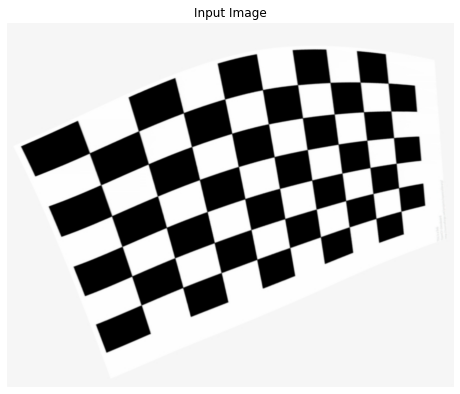

In [3]:
#read image
image = cv2.imread('harris.png')
#convert the image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow(image)
title('Input Image')
axis('off')

(-0.5, 819.5, 667.5, -0.5)

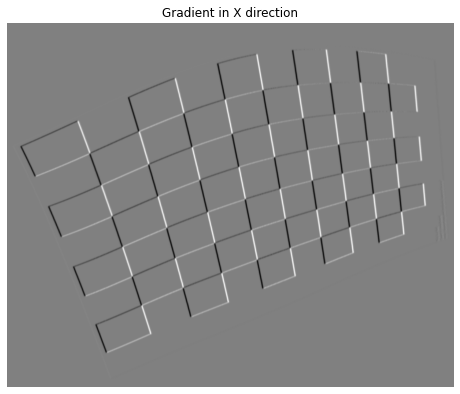

In [4]:
#calculate the gradient in X direction
i_x = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0)
imshow(i_x, cmap='gray')
title('Gradient in X direction')
axis('off')

(-0.5, 819.5, 667.5, -0.5)

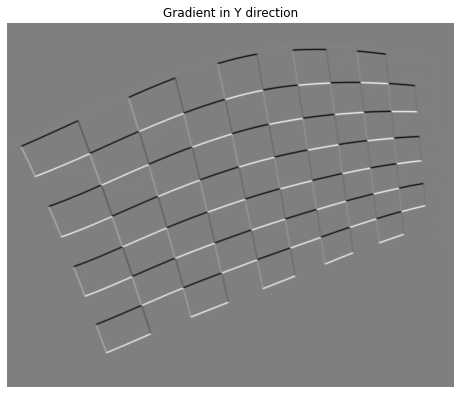

In [5]:
#calculate the gradient in Y direction
i_y = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1)
imshow(i_y, cmap='gray')
title('Gradient in Y direction')
axis('off')

In [6]:
#calculate the product of derivates in each direction
i_xx = multiply(i_x, i_x)
i_xy = multiply(i_x, i_y)
i_yy = multiply(i_y, i_y)

In [7]:
#calculate the sum of product of derivates
s_xx = cv2.GaussianBlur(i_xx, (5,5), 0)
s_xy = cv2.GaussianBlur(i_xy, (5,5), 0)
s_yy = cv2.GaussianBlur(i_yy, (5,5), 0)

In [8]:
#response of the detector at each point
k = .04 #recommended value .04 - .06
det_h = multiply(s_xx, s_yy) - multiply(s_xy, s_xy)
trace_h = s_xx + s_yy
R = det_h - k*multiply(trace_h, trace_h)

(-0.5, 819.5, 667.5, -0.5)

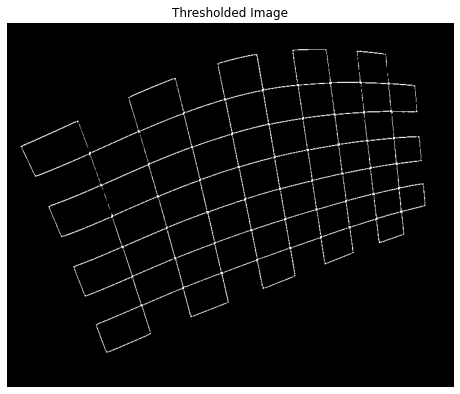

In [9]:
#threshold the image
ratio = .2 
thresh = abs(R) > ratio * abs(R).max()
imshow(thresh, cmap=gray())
title('Thresholded Image')
axis('off')

Non-Maximal Supression

In [10]:
#indexes of non zero value
non_zero_cords = np.nonzero(thresh)

#tupled co-ordinates
tuple_cords = [(i, j) for i,j in zip(non_zero_cords[0], non_zero_cords[1])] 
#values co-ordinates
values = [abs(R)[i, j] for i, j in tuple_cords]
#sort co-ordinates (R values)
sorted_cords = [tuple_cords[i] for i in argsort(values)[::-1]]
distance = 10 #distance to perform NMS
nms_cords = [] #list to hold the cords after NMS
nms_cords.append(sorted_cords[0])
for cord in sorted_cords:
    for nms_cord in nms_cords:
        if abs(cord[0]-nms_cord[0]) < distance and abs(cord[1]-nms_cord[1]) < distance: break
    else:
        nms_cords.append(cord)
print ("Points detected BEFORE NMS = {} ".format(sum(thresh)))
print ("Points detected AFTER NMS = {} ".format(len(nms_cords)))

Points detected BEFORE NMS = 12571 
Points detected AFTER NMS = 589 


(-0.5, 819.5, 667.5, -0.5)

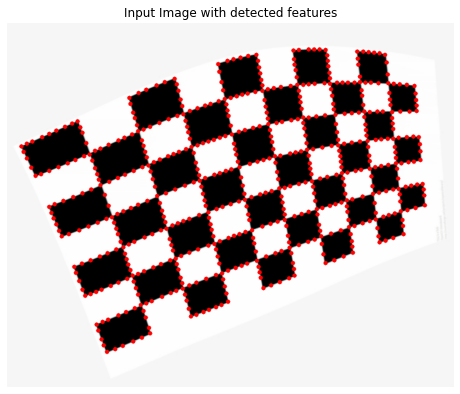

In [11]:
#result with detected corners
for nms_cord in nms_cords:
    cv2.circle(image, (nms_cord[1], nms_cord[0]), 4, (0, 0, 255), -1)
imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
title('Input Image with detected features')
axis('off')